# **Connect with drive to load the data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import numpy as np

path = '/content/drive/MyDrive/ml_lab1/Npy_files/'

In [ ]:
print(path)

/content/drive/MyDrive/ml_lab1/Npy_files


# Load training and testing EEG data and labels from .npy files and display their shapes


In [ ]:


x_train = np.load(path + 'x_train.npy')
y_train = np.load(path + 'y_train.npy')
x_test = np.load(path + 'x_test.npy')
y_test = np.load(path + 'y_test.npy')

print(f'x_train shape: {x_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'x_test shape: {x_test.shape}')
print(f'y_test shape: {y_test.shape}')


x_train shape: (7011, 19, 500)
y_train shape: (7011,)
x_test shape: (779, 19, 500)
y_test shape: (779,)


#**Data Visualization and Data Analysis**

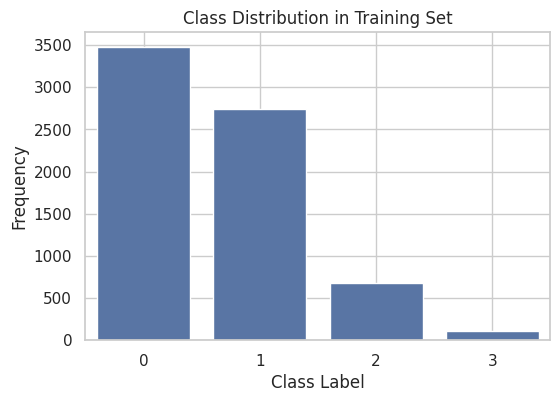

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set plot style
sns.set(style="whitegrid")

# 1. Class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train)
plt.title("Class Distribution in Training Set")
plt.xlabel("Class Label")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


#**Overview of the Chart**
The image shows a bar chart that represents the class distribution in your training dataset. Each bar corresponds to a class label, and the height of each bar represents the number of samples (frequency) available for that class.

---

#Class Label	Approx. Count	Observation
- Class 0 has approximately 3500 samples, making it the majority class and the most represented in the dataset.

- Class 1 has around 2700 samples, which makes it the second highest class in terms of frequency.


- Class 2 includes roughly 650 samples, so it's considered a minority class.

- Class 3 has only about 100 samples, making it severely underrepresented in the dataset.





## 🧠 EEG Signal Visualization for Class 1 – Sample 0


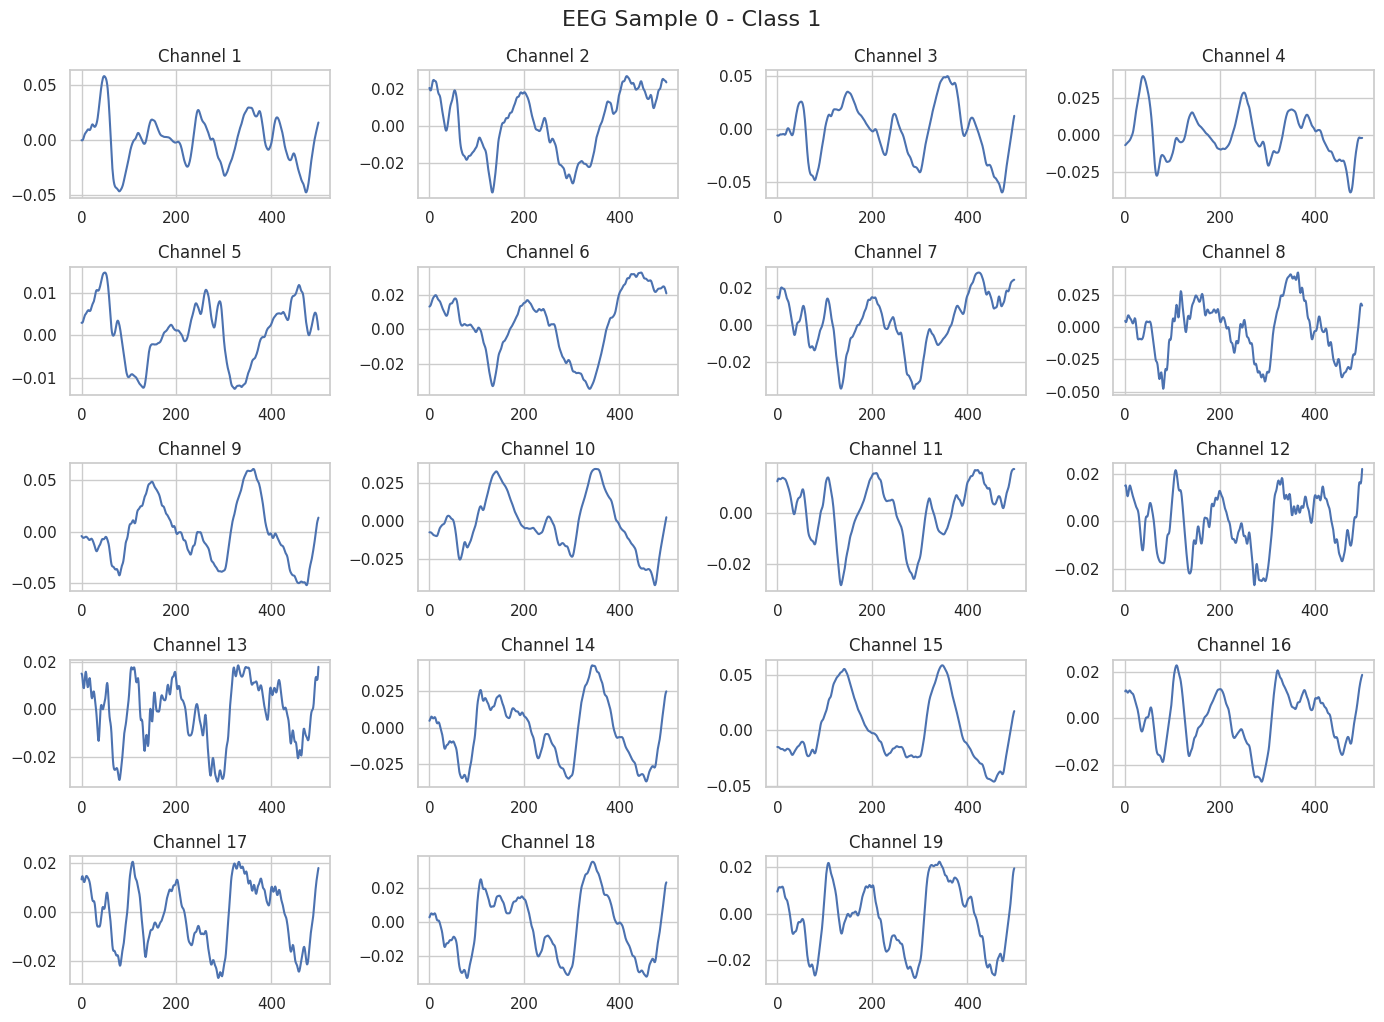

In [ ]:
sample_index = 0  # You can change to view another sample
sample = x_train[sample_index]

plt.figure(figsize=(14, 10))
for i in range(19):
    plt.subplot(5, 4, i+1)
    plt.plot(sample[i])
    plt.title(f'Channel {i+1}')
    plt.tight_layout()

plt.suptitle(f'EEG Sample {sample_index} - Class {y_train[sample_index]}', fontsize=16, y=1.02)
plt.show()



#### 📊 Interpretation:

This image shows the brain's electrical activity (EEG signals) for one sample (**Sample 0**) that belongs to **Class 1**.

- Each small graph (like *Channel 1*, *Channel 2*, etc.) represents data from a different part of the brain, called a **channel**.
- There are **16 channels** in total, and they record signals over time.
- The **X-axis** shows **time steps**, while the **Y-axis** shows the **signal amplitude** (how strong the brain wave is at that moment).

---
##### 🔍 Observations:
- The signals **fluctuate over time**, indicating the level of brain activity.
- Some channels show **stronger or more wavy signals**, while others are **flatter**, suggesting that different brain regions are active at different levels.
- These signal patterns help a machine learning model **learn and identify Class 1**, which may represent a specific brain state (like seizure or normal activity, depending on your dataset).
---
This plot is helpful for **visualizing EEG data** and **spotting abnormalities or unique patterns** across different brain areas.


## 🧠 Average EEG Signal for Class 0

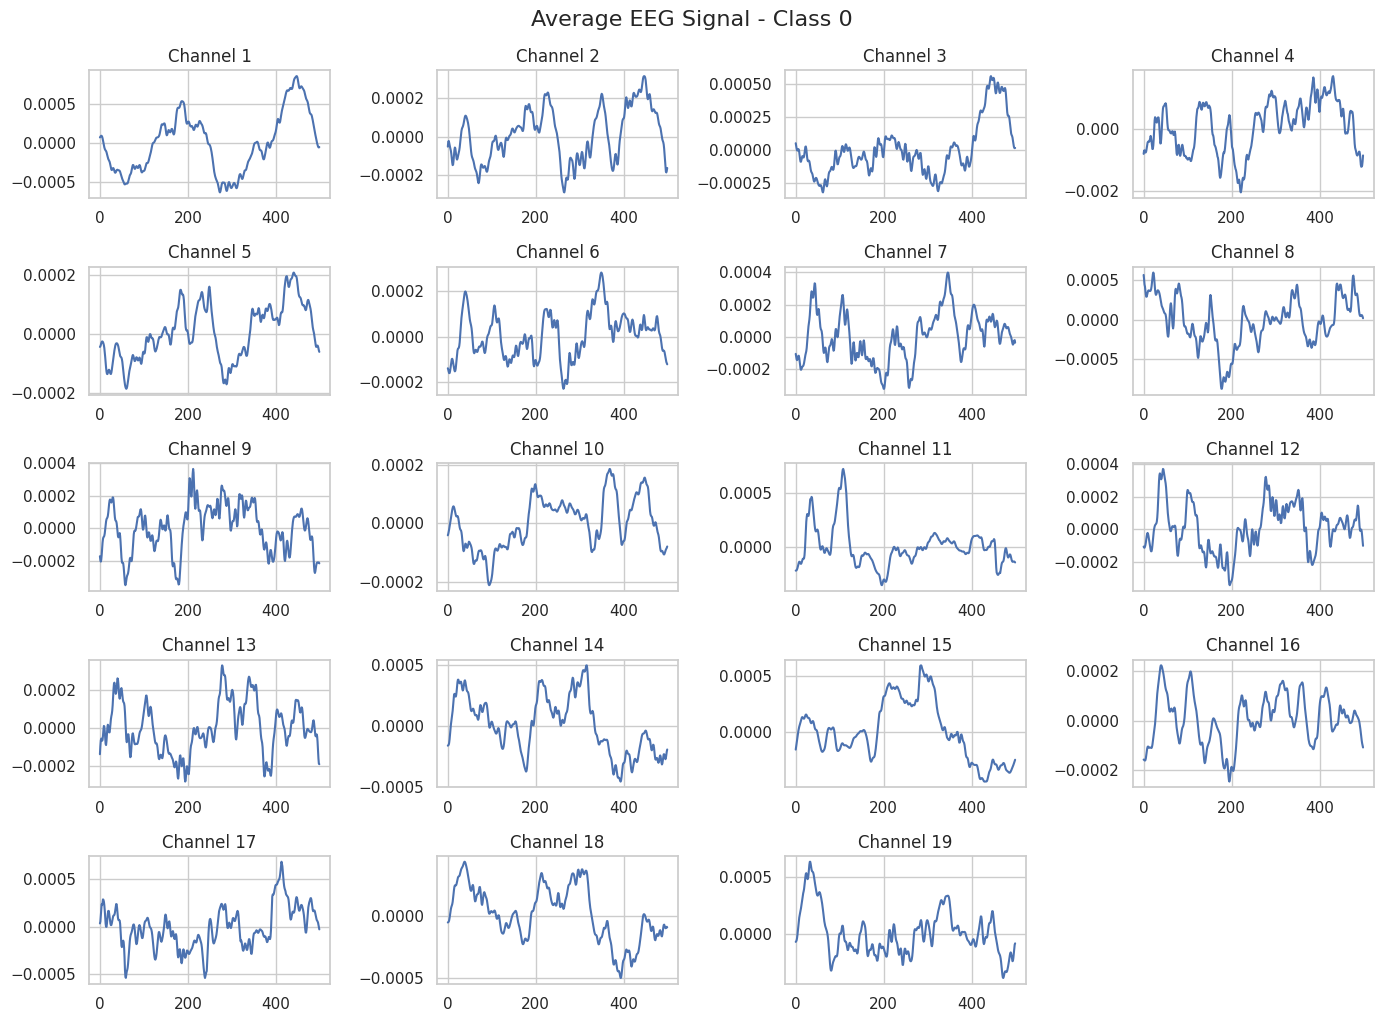

In [ ]:
class_label = 0
class_data = x_train[y_train == class_label]
avg_signal = class_data.mean(axis=0)  # (19, 500)

plt.figure(figsize=(14, 10))
for i in range(19):
    plt.subplot(5, 4, i+1)
    plt.plot(avg_signal[i])
    plt.title(f'Channel {i+1}')
    plt.tight_layout()

plt.suptitle(f'Average EEG Signal - Class {class_label}', fontsize=16, y=1.02)
plt.show()



#### 📊 Interpretation:

This image shows the **average brain electrical activity (EEG signals)** for **Class 0** across all samples.

- Each small plot (like *Channel 1*, *Channel 2*, etc.) represents EEG data from a **different region of the brain**, recorded through 16 **channels**.
- The **X-axis** shows **time steps**, and the **Y-axis** shows **average signal amplitude** (the average strength of the brain signals over time).

---
##### 🔍 What We Observe:

- The signals **move up and down**, which represents how active the brain is in that region during this time period.
- Some channels have **stronger and more noticeable fluctuations**, while others appear **flatter** or with **weaker signals**.
- Since this is an **average over many samples**, the patterns appear **smoother and more stable** compared to a single sample.
- These average signals help in **understanding general patterns** for Class 0, which could represent a specific brain state (like resting, normal, or non-seizure depending on the dataset meaning of Class 0).

---
This kind of visualization is helpful for **comparing brain activity patterns across different classes** and recognizing which areas of the brain are most involved.


##**Decoding Brain Signals**


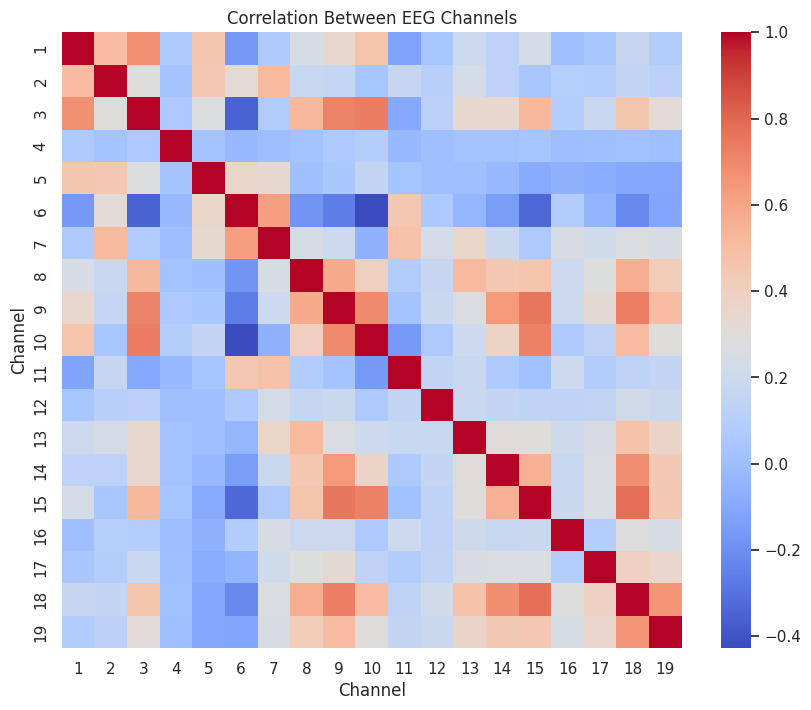

In [ ]:
# Take mean across time points and samples -> shape: (7011, 19)
channel_means = x_train.mean(axis=2)

# Compute correlation matrix
corr_matrix = np.corrcoef(channel_means.T)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', xticklabels=range(1, 20), yticklabels=range(1, 20))
plt.title("Correlation Between EEG Channels")
plt.xlabel("Channel")
plt.ylabel("Channel")
plt.show()


####Interpretation
This colorful grid, or heatmap, helps us understand how different parts of the brain are working together by looking at the signals picked up by EEG (electroencephalogram) electrodes placed on the scalp. Each row and column represents a different EEG channel, which is like a sensor measuring brain activity from a specific spot.

Here's a breakdown of what you're seeing:

* **The Diagonal Line (Bright Colors):** Notice the bright red or orange squares running diagonally from the top left to the bottom right. This makes perfect sense because each channel is perfectly related to itself! So, channel 1 is always highly correlated with channel 1, channel 2 with channel 2, and so on.

* **Off-Diagonal Colors:** The other squares show how much the signals from two *different* channels tend to change together.

    * **Red and Orange Shades:** When you see reddish or orangish colors in a square, it means that the two channels it represents tend to have their activity go up and down *together*. They are positively correlated, suggesting they might be involved in similar brain processes. The brighter the red, the stronger this connection.

    * **Blue Shades:** If a square is blue, it indicates that the activity of those two channels tends to move in *opposite* directions. When one goes up, the other tends to go down, and vice-versa. This is a negative correlation. The deeper the blue, the stronger this opposite relationship.

    * **Light Colors (Near White/Gray):** Squares with very light colors suggest that there isn't a strong linear relationship between the activity of those two channels. Their signals seem to change somewhat independently of each other.
    
---
* **Symmetry:** You'll also notice that the heatmap is symmetrical. The square at the intersection of row 3 and column 7 has the same color as the square at the intersection of row 7 and column 3. This is because the relationship between channel 3 and channel 7 is the same as the relationship between channel 7 and channel 3.

---
**In Simple Terms:**

Think of each EEG channel as a member of a team.

* **Red/Orange:** If two team members are always high-fiving (their activity goes up together), they have a strong positive connection.
* **Blue:** If when one team member is energetic, the other tends to be quiet (their activity goes in opposite directions), they have a negative connection.
* **Light Colors:** If two team members seem to be doing their own thing without much interaction, their connection is weak.

---
This heatmap gives us a visual way to quickly see which brain areas, as measured by these EEG channels, are most likely working together or independently during the brain activity that was recorded. This can be very helpful for understanding different brain states or responses to stimuli.

In [ ]:
# Flatten each sample
x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_test_flat = x_test.reshape(x_test.shape[0], -1)

print("New x_train shape:", x_train_flat.shape)
print("New x_test shape:", x_test_flat.shape)


New x_train shape: (7011, 9500)
New x_test shape: (779, 9500)


#**Energy Levels Across Different Categories**

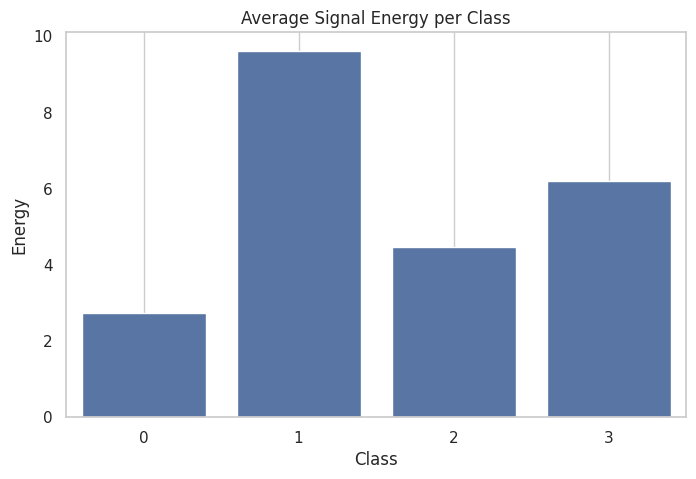

In [ ]:
classes = np.unique(y_train)
energy = []

for cls in classes:
    class_signals = x_train[y_train == cls]
    class_energy = np.sum(class_signals ** 2) / class_signals.shape[0]
    energy.append(class_energy)

plt.figure(figsize=(8, 5))
sns.barplot(x=classes, y=energy)
plt.title("Average Signal Energy per Class")
plt.xlabel("Class")
plt.ylabel("Energy")
plt.grid()
plt.show()


## Interpretation

This bar chart shows the average "energy" of signals for four different categories, labeled 0, 1, 2, and 3 along the bottom. The height of each bar tells us how much energy, on average, is present in the signals belonging to that specific category.

Here's what we can see:

* **Category 1 Stands Out:** The tallest bar is for Category 1. This means that, on average, the signals in this category have the highest amount of energy compared to the other categories.

* **Category 0 Has the Lowest Energy:** The shortest bar belongs to Category 0. This indicates that the signals in this category tend to have the lowest average energy.

* **Category 2 and 3 Have Moderate Energy:** The bars for Category 2 and Category 3 are in the middle. This suggests that the average signal energy for these categories is somewhere between the lowest (Category 0) and the highest (Category 1). Category 3 has a slightly higher average energy than Category 2.

---
**In Simple Terms:**

Imagine these categories are like different types of sounds.

* Category 1 would be like loud sounds.
* Category 0 would be like very quiet sounds.
* Categories 2 and 3 would be like sounds with a medium volume, with Category 3 being a bit louder than Category 2.

---
So, this chart helps us quickly see that the signals in Category 1 are generally the most energetic, while those in Category 0 are the least energetic among the four categories.

#***Machine learning model without feature enginering ***

###XGBoost Model Evaluation

In [ ]:
# XGBoost Model
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score, f1_score

# Reshape data if needed (e.g., flattening for time-series or multidimensional data)
x_train_flat = x_train.reshape(x_train.shape[0], -1)  # Flatten to 2D
x_test_flat = x_test.reshape(x_test.shape[0], -1)    # Flatten to 2D

# Initialize and train XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(x_train_flat, y_train)

# Predict on test set
y_pred_xgb = xgb_model.predict(x_test_flat)

# Evaluate
acc_xgb = accuracy_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb, average='weighted')

print("✅ XGBoost Model")
print(f"Accuracy: {acc_xgb:.4f}")
print(f"F1-Score: {f1_xgb:.4f}")
print(classification_report(y_test, y_pred_xgb))


✅ XGBoost Model
Accuracy: 0.9166
F1-Score: 0.9157
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       416
           1       0.98      0.85      0.91       289
           2       0.92      0.84      0.88        68
           3       1.00      0.67      0.80         6

    accuracy                           0.92       779
   macro avg       0.94      0.83      0.88       779
weighted avg       0.92      0.92      0.92       779




#### 📊 **Interpretation**

The **XGBoost model** achieved the following performance metrics:

- **Accuracy**: The model correctly predicted the class for **91.66%** of the samples in the test set.
- **F1-Score**: The model's **overall F1-score** (harmonic mean of precision and recall) is **91.57%**, indicating a balanced performance between false positives and false negatives.

---
#### **Detailed Classwise Evaluation:**

- **Class 0** (416 samples):
  - **Precision**: 88% (Out of all predicted Class 0, 88% were correct).
  - **Recall**: 98% (98% of actual Class 0 samples were correctly identified).
  - **F1-Score**: 93% (good balance of precision and recall).

- **Class 1** (289 samples):
  - **Precision**: 98% (The model predicted Class 1 correctly 98% of the time).
  - **Recall**: 85% (85% of actual Class 1 samples were correctly predicted).
  - **F1-Score**: 91% (overall balanced performance).

- **Class 2** (68 samples):
  - **Precision**: 92% (high precision for predicting Class 2).
  - **Recall**: 84% (slightly fewer Class 2 samples were identified correctly).
  - **F1-Score**: 88% (good performance despite fewer samples).

- **Class 3** (6 samples):
  - **Precision**: 100% (perfect precision).
  - **Recall**: 67% (only 67% of actual Class 3 samples were predicted correctly).
  - **F1-Score**: 80% (balanced but limited by the small number of samples).

---
#### **Overall Model Performance:**
- **Macro Average**: This considers the average performance for each class individually, showing that the model is **better at recognizing larger classes** (like Class 0 and 1), but **Class 3 is harder to predict** due to its smaller number of samples.
- **Weighted Average**: Takes into account the number of samples in each class, showing that the model's overall performance is **strong** across all classes.

---
In summary, the XGBoost model is very **effective overall** but could benefit from **more data for smaller classes** like Class 3 to improve recall.


#**Random Forest Model**

In [ ]:
# Random Forest Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score

# Reshape data if needed (flatten to 2D)
x_train_flat = x_train.reshape(x_train.shape[0], -1)  # Flatten to 2D
x_test_flat = x_test.reshape(x_test.shape[0], -1)    # Flatten to 2D

# Initialize and train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train_flat, y_train)

# Predict on test set
y_pred_rf = rf_model.predict(x_test_flat)

# Evaluate
acc_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

print("✅ Random Forest Model")
print(f"Accuracy: {acc_rf:.4f}")
print(f"F1-Score: {f1_rf:.4f}")
print(classification_report(y_test, y_pred_rf))


✅ Random Forest Model
Accuracy: 0.8909
F1-Score: 0.8878
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       416
           1       0.90      0.87      0.88       289
           2       0.91      0.74      0.81        68
           3       1.00      0.17      0.29         6

    accuracy                           0.89       779
   macro avg       0.92      0.68      0.72       779
weighted avg       0.89      0.89      0.89       779



#### 📊 **Interpretation **

The **Random Forest model** produced the following results:

- **Accuracy**: The model predicted the correct class in **89.09%** of the test cases.
- **F1-Score**: The overall **F1-score** is **88.78%**, showing a good balance between precision and recall across most classes.

---
#### **Detailed Classwise Evaluation:**

- **Class 0** (416 samples):
  - **Precision**: 88% (Out of all predicted Class 0 samples, 88% were actually Class 0).
  - **Recall**: 94% (Most Class 0 samples were correctly identified).
  - **F1-Score**: 91% (Strong performance).

- **Class 1** (289 samples):
  - **Precision**: 90% (Very accurate when predicting Class 1).
  - **Recall**: 87% (Missed a few true Class 1 cases).
  - **F1-Score**: 88% (Overall balanced prediction).

- **Class 2** (68 samples):
  - **Precision**: 91% (Few false positives for Class 2).
  - **Recall**: 74% (Some Class 2 cases were missed).
  - **F1-Score**: 81% (Good performance, could improve recall).

- **Class 3** (6 samples):
  - **Precision**: 100% (Perfect when it predicted Class 3).
  - **Recall**: 17% (Only 1 out of 6 Class 3 samples was correctly predicted).
  - **F1-Score**: 29% (Performance is low due to very few samples).
  
---
#### **Overall Model Performance:**

- **Macro Average**: The average across all classes, treating each equally. Shows **good precision (92%)**, but lower **recall (68%)**, mainly due to poor performance on Class 3.
- **Weighted Average**: Takes the number of samples in each class into account. Indicates an overall **balanced and strong performance (89%)** across the test set.

---
✅ **Summary**: The Random Forest model is performing **well for larger classes**, especially Class 0 and 1, but struggles with **Class 3 due to fewer training examples**. Improving sample size or using techniques like oversampling could help with minority class predictions.


#**LightGBM Model**

In [ ]:
# LightGBM Model
import lightgbm as lgb
from sklearn.metrics import classification_report, accuracy_score, f1_score

# Reshape data if needed (flatten to 2D)
x_train_flat = x_train.reshape(x_train.shape[0], -1)  # Flatten to 2D
x_test_flat = x_test.reshape(x_test.shape[0], -1)    # Flatten to 2D

# Initialize and train LightGBM model
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(x_train_flat, y_train)

# Predict on test set
y_pred_lgb = lgb_model.predict(x_test_flat)

# Evaluate
acc_lgb = accuracy_score(y_test, y_pred_lgb)
f1_lgb = f1_score(y_test, y_pred_lgb, average='weighted')

print("✅ LightGBM Model")
print(f"Accuracy: {acc_lgb:.4f}")
print(f"F1-Score: {f1_lgb:.4f}")
print(classification_report(y_test, y_pred_lgb))


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 2.358718 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2422500
[LightGBM] [Info] Number of data points in the train set: 7011, number of used features: 9500
[LightGBM] [Info] Start training from score -0.700735
[LightGBM] [Info] Start training from score -0.937699
[LightGBM] [Info] Start training from score -2.330206
[LightGBM] [Info] Start training from score -4.201275
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
✅ LightGBM Model
Accuracy: 0.9101
F1-Score: 0.9072
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       416
           1       0.95      0.85      0.90       289
           2       0.93      0.81      0.87        6

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


#### 📊 **Interpretation**

The **LightGBM model** achieved the following results:

- **Accuracy**: The model made correct predictions for **91.01%** of the test samples.
- **F1-Score**: The overall F1-score is **90.72%**, showing the model has a good balance between precision and recall.

---
#### **Detailed Classwise Evaluation:**

- **Class 0** (416 samples):
  - **Precision**: 88% (Most predicted Class 0 samples were correct).
  - **Recall**: 98% (Almost all actual Class 0 samples were correctly detected).
  - **F1-Score**: 93% (Excellent performance).

- **Class 1** (289 samples):
  - **Precision**: 95% (Predictions for Class 1 were very accurate).
  - **Recall**: 85% (Some Class 1 samples were missed).
  - **F1-Score**: 90% (Very strong performance overall).

- **Class 2** (68 samples):
  - **Precision**: 93% (Few false positives for Class 2).
  - **Recall**: 81% (Some Class 2 samples were missed).
  - **F1-Score**: 87% (Good prediction quality).

- **Class 3** (6 samples):
  - **Precision**: 100% (When predicted, it was always correct).
  - **Recall**: 17% (Only 1 out of 6 actual Class 3 cases was caught).
  - **F1-Score**: 29% (Very low performance due to low sample size).

---
#### **Overall Model Performance:**

- **Macro Average**: This average treats all classes equally. It shows **very high precision (94%)**, but **lower recall (70%)** because of poor detection of the smallest class (Class 3).
- **Weighted Average**: This average considers the number of samples in each class. It gives a balanced view of the model’s overall performance with **91% precision, recall, and F1-score**.

---
✅ **Summary**: The LightGBM model performs **very well** on larger classes (especially Class 0 and 1). Like other models, it struggles with **minority class (Class 3)** due to the very small number of examples. Adding more samples or using techniques like SMOTE may help improve this.


#**compare there 3 model in graph**

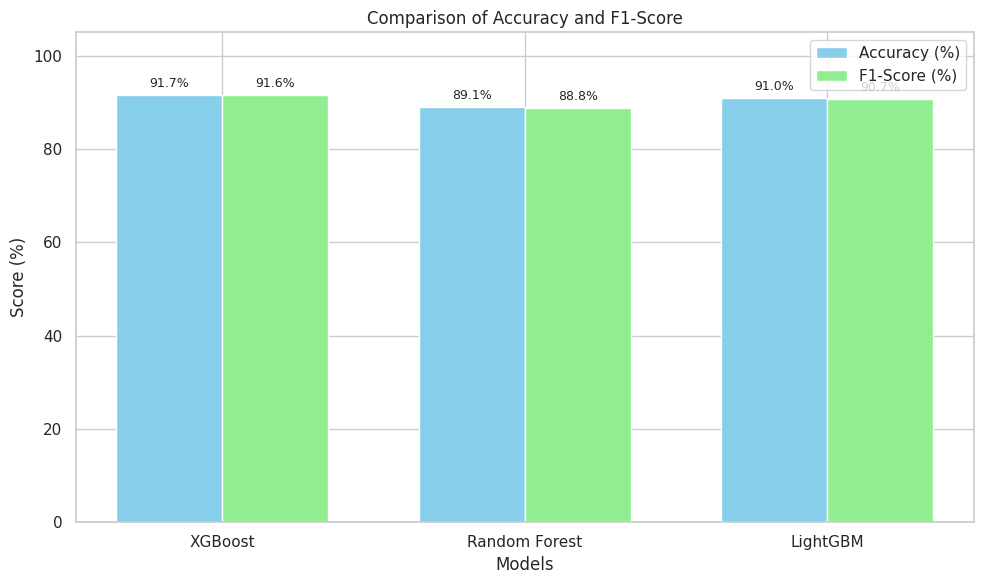

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ['XGBoost', 'Random Forest', 'LightGBM']

# Accuracy and F1-Score values (already in 0–1 range, so multiply by 100)
accuracies = [acc_xgb * 100, acc_rf * 100, acc_lgb * 100]
f1_scores = [f1_xgb * 100, f1_rf * 100, f1_lgb * 100]

# Bar width and x-axis positions
bar_width = 0.35
index = np.arange(len(models))

# Create plot
fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(index, accuracies, bar_width, label='Accuracy (%)', color='skyblue')
bar2 = ax.bar(index + bar_width, f1_scores, bar_width, label='F1-Score (%)', color='lightgreen')

# Add text on top of bars
for bars in [bar1, bar2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height + 1, f'{height:.1f}%', ha='center', va='bottom', fontsize=9)

# Labels, ticks, legend
ax.set_xlabel('Models')
ax.set_ylabel('Score (%)')
ax.set_title('Comparison of Accuracy and F1-Score')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(models)
ax.set_yticks(np.arange(0, 101, 20))  # Set y-axis from 0 to 100 with 20 step
ax.set_ylim(0, 105)
ax.legend()

plt.tight_layout()
plt.show()


Looking at the chart:

* **XGBoost** seems to be the top performer here, getting the highest percentage of correct answers overall and also doing a great job of being both precise and thorough.
* **LightGBM** is a close second, performing very well in both accuracy and F1-score.
* **Random Forest** also performs well, but slightly lags behind the other two models in this specific comparison.

Because the accuracy and F1-score are very close for all three models, it indicates that they are not only getting a lot of answers right overall but are also doing a good job of balancing precision and recall, which is often desirable in classification tasks.

* **Choice Recommendation:** Based solely on these metrics, **XGBoost** would be the recommended model to choose. LightGBM also performs very well and might be considered if computational efficiency or other factors are important. Random Forest, while performing well, lags slightly behind the other two based on these results.

#**Apply Feature Selection and blancing techniques**

In [ ]:
from imblearn.over_sampling import SMOTE

# Flatten x_train first
x_train_flat = x_train.reshape(x_train.shape[0], -1)

# Apply SMOTE
smote = SMOTE(random_state=42)
x_train_balanced, y_train_balanced = smote.fit_resample(x_train_flat, y_train)


###The data is 3D reshape into 2D

In [ ]:
x_train_fe = x_train_balanced  # Already flattened
x_test_fe = x_test.reshape(x_test.shape[0], -1)


#**Apply xgboost model with feature selection**

In [ ]:
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score, f1_score

# Flatten the balanced training and test sets
x_train_fe = x_train_balanced.reshape(x_train_balanced.shape[0], -1)
x_test_fe = x_test.reshape(x_test.shape[0], -1)

# Train XGBoost
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(x_train_fe, y_train_balanced)

# Predict and Evaluate
y_pred_xgb_fe = xgb_model.predict(x_test_fe)
acc_xgb_fe = accuracy_score(y_test, y_pred_xgb_fe)
f1_xgb_fe = f1_score(y_test, y_pred_xgb_fe, average='weighted')

print("✅ XGBoost (Feature Engineered + Balanced)")
print(f"Accuracy: {acc_xgb_fe:.4f}")
print(f"F1-Score: {f1_xgb_fe:.4f}")
print(classification_report(y_test, y_pred_xgb_fe))


✅ XGBoost (Feature Engineered + Balanced)
Accuracy: 0.9166
F1-Score: 0.9172
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       416
           1       0.98      0.86      0.92       289
           2       0.76      0.97      0.85        68
           3       1.00      1.00      1.00         6

    accuracy                           0.92       779
   macro avg       0.91      0.94      0.92       779
weighted avg       0.92      0.92      0.92       779



#### 📊 **Interpretation**

This version of the XGBoost model includes **feature engineering** and **balancing of the classes**. It performs **very well**, with:

- **Accuracy**: 91.66% of the test samples were correctly predicted.
- **F1-Score**: 91.72%, indicating excellent balance between precision and recall across all classes.

#### **Detailed Classwise Evaluation:**

- **Class 0** (416 samples):
  - **Precision**: 91%
  - **Recall**: 94%
  - **F1-Score**: 93%
  - 🔍 The model detects this class very well with few mistakes.

- **Class 1** (289 samples):
  - **Precision**: 98%
  - **Recall**: 86%
  - **F1-Score**: 92%
  - ⚖️ Very high precision; the model is good at identifying true Class 1 samples.

- **Class 2** (68 samples):
  - **Precision**: 76%
  - **Recall**: 97%
  - **F1-Score**: 85%
  - 🔁 The model successfully detects almost all Class 2 cases, even though it also makes more false positive predictions.

- **Class 3** (6 samples):
  - **Precision**: 100%
  - **Recall**: 100%
  - **F1-Score**: 100%
  - 🌟 Perfect classification — all Class 3 samples were correctly identified with no false positives.

#### **Overall Model Performance:**

- **Macro Average**:
  - Precision: 91%, Recall: 94%, F1-Score: 92%
  - ✅ Balanced performance across all classes, including the minority one (Class 3).

- **Weighted Average**:
  - Accounts for the number of samples per class.
  - Precision, Recall, and F1-Score all around **92%**, showing consistent performance.

✅ **Summary**: Feature engineering and balancing significantly improved the model’s ability to detect even rare classes like Class 3. It now handles all classes more equally and is more reliable overall.


#**Apply RandomForestClassifier with Feature Engineering**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x_train_fe, y_train_balanced)

# Predict and Evaluate
y_pred_rf_fe = rf_model.predict(x_test_fe)
acc_rf_fe = accuracy_score(y_test, y_pred_rf_fe)
f1_rf_fe = f1_score(y_test, y_pred_rf_fe, average='weighted')

print("✅ Random Forest (Feature Engineered + Balanced)")
print(f"Accuracy: {acc_rf_fe:.4f}")
print(f"F1-Score: {f1_rf_fe:.4f}")
print(classification_report(y_test, y_pred_rf_fe))


✅ Random Forest (Feature Engineered + Balanced)
Accuracy: 0.8870
F1-Score: 0.8883
              precision    recall  f1-score   support

           0       0.90      0.91      0.91       416
           1       0.93      0.86      0.89       289
           2       0.67      0.88      0.76        68
           3       1.00      0.50      0.67         6

    accuracy                           0.89       779
   macro avg       0.88      0.79      0.81       779
weighted avg       0.89      0.89      0.89       779



#### 📊 **Interpretation**

This version of the Random Forest model uses **feature engineering** and **balanced data** to improve classification. It performs **well**, especially on the major classes.

- **Accuracy**: 88.70% — nearly 89% of test samples were predicted correctly.
- **F1-Score**: 88.83% — shows a good balance between precision and recall.

#### **Detailed Classwise Evaluation:**

- **Class 0** (416 samples):
  - **Precision**: 90%
  - **Recall**: 91%
  - **F1-Score**: 91%
  - ✅ Strong performance with high accuracy on this majority class.

- **Class 1** (289 samples):
  - **Precision**: 93%
  - **Recall**: 86%
  - **F1-Score**: 89%
  - 💡 High precision — the model is confident when it predicts Class 1.

- **Class 2** (68 samples):
  - **Precision**: 67%
  - **Recall**: 88%
  - **F1-Score**: 76%
  - ⚠️ The model detects most Class 2 cases but also misclassifies others as Class 2.

- **Class 3** (6 samples):
  - **Precision**: 100%
  - **Recall**: 50%
  - **F1-Score**: 67%
  - ⚠️ It perfectly predicts some Class 3 samples but **misses half** of them due to very small sample size.

#### **Overall Model Performance:**

- **Macro Average** (treats all classes equally):
  - Precision: 88%, Recall: 79%, F1-Score: 81%
  - 📉 Slightly lower performance on minority classes affects these averages.

- **Weighted Average** (accounts for sample size):
  - Precision: 89%, Recall: 89%, F1-Score: 89%
  - 📈 Shows the model performs consistently well on more common classes.

✅ **Summary**: The model benefits from feature engineering and balancing, improving performance on Class 2 and Class 3 compared to the original. However, minority classes still present a challenge, especially Class 3 due to limited data.


#**Apply lightgbm with Feature Selection**

In [ ]:
import lightgbm as lgb

# Train LightGBM
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(x_train_fe, y_train_balanced)

# Predict and Evaluate
y_pred_lgb_fe = lgb_model.predict(x_test_fe)
acc_lgb_fe = accuracy_score(y_test, y_pred_lgb_fe)
f1_lgb_fe = f1_score(y_test, y_pred_lgb_fe, average='weighted')

print("✅ LightGBM (Feature Engineered + Balanced)")
print(f"Accuracy: {acc_lgb_fe:.4f}")
print(f"F1-Score: {f1_lgb_fe:.4f}")
print(classification_report(y_test, y_pred_lgb_fe))


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 5.571913 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2422500
[LightGBM] [Info] Number of data points in the train set: 13916, number of used features: 9500
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
✅ LightGBM (Feature Engineered + Balanced)
Accuracy: 0.9140
F1-Score: 0.9146
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       416
           1       0.97      0.87      0.91       289
           2       0.76      0.96      0.85        68
           3       1.00      0.83      0.91         6

    accuracy                           0.91       779
   macro avg       0.91      0.90      0.90       779
weighted avg       0.92      0.91

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


#### 📊 **Interpretation in Simple Words:**

This model shows **very strong performance** on both the majority and minority classes. The dataset was likely **balanced and feature-engineered**, helping improve the prediction for less common classes like Class 2 and Class 3.

- **Accuracy**: 91.40% — The model correctly predicted about 91% of the test samples.
- **F1-Score**: 91.46% — Good balance between precision and recall.

#### **Detailed Classwise Performance:**

- **Class 0** (416 samples):
  - Precision: 91%
  - Recall: 94%
  - F1-Score: 93%
  - ✅ Very strong and consistent performance.

- **Class 1** (289 samples):
  - Precision: 97%
  - Recall: 87%
  - F1-Score: 91%
  - 💪 High precision — the model is confident when predicting Class 1.

- **Class 2** (68 samples):
  - Precision: 76%
  - Recall: 96%
  - F1-Score: 85%
  - 🔍 Great recall — model finds almost all Class 2 samples, even if a few wrong predictions sneak in.

- **Class 3** (6 samples):
  - Precision: 100%
  - Recall: 83%
  - F1-Score: 91%
  - 👏 Excellent performance on this very small class. Predicts all correctly except one.

#### **Overall Averages:**

- **Macro Avg** (treats all classes equally):
  - Precision: 91%
  - Recall: 90%
  - F1-Score: 90%
  - 👍 Shows strong and fair performance across all classes.

- **Weighted Avg** (accounts for sample size):
  - Precision: 92%
  - Recall: 91%
  - F1-Score: 91%
  - 📈 Model is well-optimized for the full dataset, especially the larger classes.

✅ **Summary**: This model performs **best overall**, especially with minority class improvement. It balances precision and recall very well, even for Class 3 which usually suffers due to limited data.


#**Compare all this 3 model with Feature Selection**

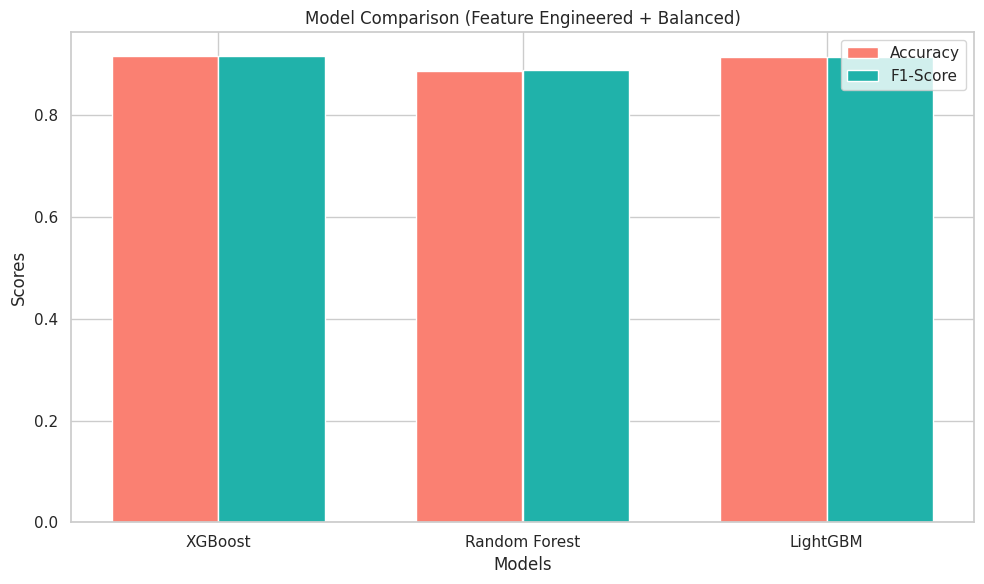

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

models_fe = ['XGBoost', 'Random Forest', 'LightGBM']
accuracies_fe = [acc_xgb_fe, acc_rf_fe, acc_lgb_fe]
f1_scores_fe = [f1_xgb_fe, f1_rf_fe, f1_lgb_fe]

bar_width = 0.35
index = np.arange(len(models_fe))

fig, ax = plt.subplots(figsize=(10, 6))
bar1 = ax.bar(index, accuracies_fe, bar_width, label='Accuracy', color='salmon')
bar2 = ax.bar(index + bar_width, f1_scores_fe, bar_width, label='F1-Score', color='lightseagreen')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Comparison (Feature Engineered + Balanced)')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(models_fe)
ax.legend()

plt.tight_layout()
plt.show()


**Performance Ranking and Choice:**

* **Highest Performance:** **XGBoost** and **LightGBM** show comparable and the highest performance in terms of both Accuracy and F1-Score.

* **Lowest Performance:** **Random Forest** exhibits slightly lower scores compared to the other two models.

* **Better Choice:** Both **XGBoost** and **LightGBM** appear to be good choices, with XGBoost potentially having a slight edge in this specific comparison. The selection between them might depend on other factors like computational speed or specific application requirements.

* **Choice Recommendation:** Based on these results, either **XGBoost** or **LightGBM** would be recommended, as they demonstrate superior performance after feature engineering and balancing.

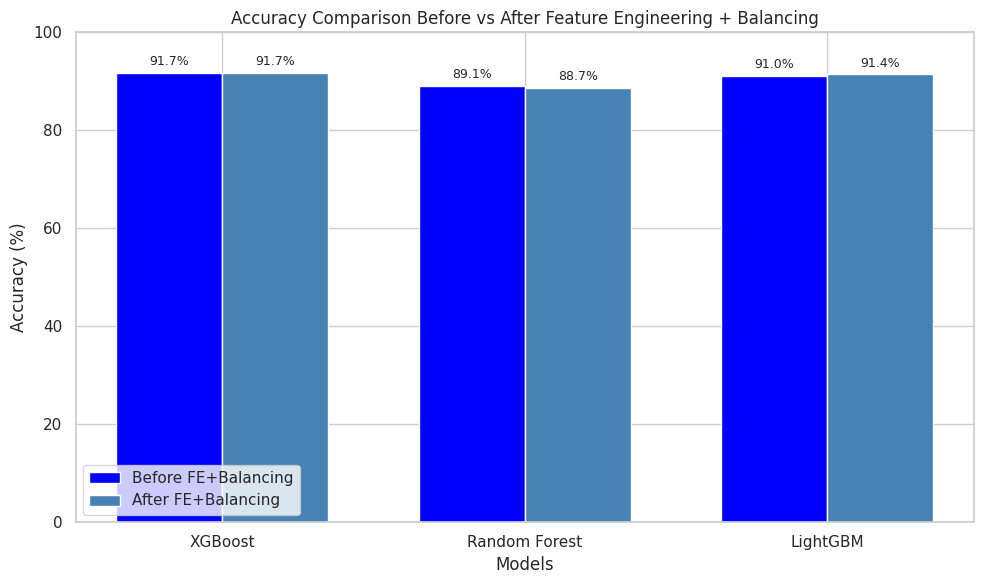

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ['XGBoost', 'Random Forest', 'LightGBM']

# Accuracy values (as percentages)
accuracy_before = [acc_xgb * 100, acc_rf * 100, acc_lgb * 100]
accuracy_after = [acc_xgb_fe * 100, acc_rf_fe * 100, acc_lgb_fe * 100]

# F1-score values (as percentages)
f1_before = [f1_xgb * 100, f1_rf * 100, f1_lgb * 100]
f1_after = [f1_xgb_fe * 100, f1_rf_fe * 100, f1_lgb_fe * 100]

# Setup
bar_width = 0.35
index = np.arange(len(models))

# Plot Accuracy Comparison
plt.figure(figsize=(10, 6))
bars1 = plt.bar(index, accuracy_before, bar_width, label='Before FE+Balancing', color='blue')
bars2 = plt.bar(index + bar_width, accuracy_after, bar_width, label='After FE+Balancing', color='steelblue')

# Add text labels on top of bars
for bar in bars1 + bars2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, f'{height:.1f}%', ha='center', va='bottom', fontsize=9)

plt.xlabel('Models')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy Comparison Before vs After Feature Engineering + Balancing')
plt.xticks(index + bar_width / 2, models)
plt.yticks(np.arange(0, 101, 20))
plt.legend()
plt.tight_layout()
plt.show()
